# Sampling time analysis scratchpad

Attempts to analyse the sampling time based on the timestamps associated during acquisition.
Acquisition timestamps are susceptible to jitter and using the RawData example does not account for filtering overhead.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from scipy import signal
import numpy as np
import recorder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Record 200 samples worth of data, delaying acquisition by 5 seconds
# this can be done also using the command line interface of recorder.py
recorder.run(port='/dev/ttyACM0', outfile='test.out', holdoff=5, debug=False, samples=200)

INFO:recorder:Starting streamer thread, delaying acquisition by 5.00s
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Gathered 0 samples
INFO:recorder:Started acquisition
INFO:recorder:Gathered 1 samples
INFO:recorder:Gathered 98 samples
INFO:recorder:Gathered 196 samples
INFO:recorder:Gathered 294 samples
INFO:root:Acquired 294 samples (requested: 200), stopping
INFO:recorder:Stopping streamer thread


In [4]:
# Read from the recorded session
df = pd.read_csv('test.out', delimiter='\t', index_col=0)

In [5]:
df_ts = pd.DataFrame(df.index)
df_ts_diffs = df_ts.diff()

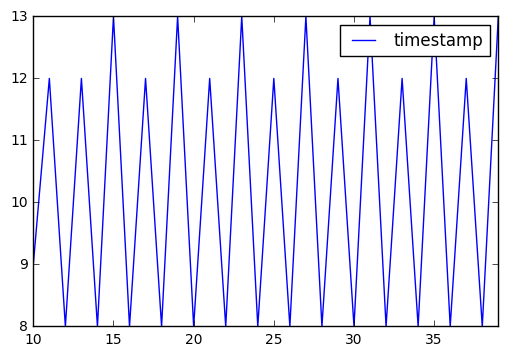

In [6]:
df_ts_diffs[10:40].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7228417890>]], dtype=object)

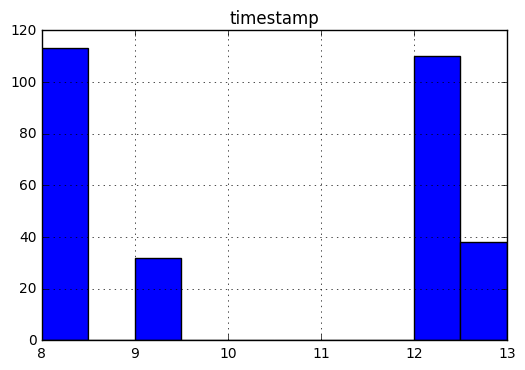

In [7]:
df_ts_diffs.hist()